***Customer Churn Analysis***

**1.  Importing Packages and reading in the dataset**

In [73]:
import numpy as np
import pandas as pd
import matplotlib as plt
customertable = pd.read_csv('data/WA_Fn-UseC_-Telco-Customer-Churn.csv')
print(customertable.head(10))

   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   
5  9305-CDSKC  Female              0      No         No       8          Yes   
6  1452-KIOVK    Male              0      No        Yes      22          Yes   
7  6713-OKOMC  Female              0      No         No      10           No   
8  7892-POOKP  Female              0     Yes         No      28          Yes   
9  6388-TABGU    Male              0      No        Yes      62          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL        

**2. Understanding the data and Cleaning it**

In [74]:
#listing Colomns
columns = list(customertable.columns)
columns

['customerID',
 'gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'tenure',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'MonthlyCharges',
 'TotalCharges',
 'Churn']

In [75]:
customertable.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [76]:
print(customertable.isnull().count())

customerID          7043
gender              7043
SeniorCitizen       7043
Partner             7043
Dependents          7043
tenure              7043
PhoneService        7043
MultipleLines       7043
InternetService     7043
OnlineSecurity      7043
OnlineBackup        7043
DeviceProtection    7043
TechSupport         7043
StreamingTV         7043
StreamingMovies     7043
Contract            7043
PaperlessBilling    7043
PaymentMethod       7043
MonthlyCharges      7043
TotalCharges        7043
Churn               7043
dtype: int64


No Null values in the data

In [77]:
#Counting the Number of records
customertable.count()

customerID          7043
gender              7043
SeniorCitizen       7043
Partner             7043
Dependents          7043
tenure              7043
PhoneService        7043
MultipleLines       7043
InternetService     7043
OnlineSecurity      7043
OnlineBackup        7043
DeviceProtection    7043
TechSupport         7043
StreamingTV         7043
StreamingMovies     7043
Contract            7043
PaperlessBilling    7043
PaymentMethod       7043
MonthlyCharges      7043
TotalCharges        7043
Churn               7043
dtype: int64

In [78]:
#removing Duplicates
customertable.drop_duplicates()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [79]:
customertable['OnlineSecurity'].unique()

array(['No', 'Yes', 'No internet service'], dtype=object)

No duplicate records detected

In [68]:
pip install category_encoders

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.1.2 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


**Performing Label coding of Categorical Variables**

In [80]:
# Import label encoder
from sklearn import preprocessing
  
# label_encoder object knows 
# how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
  
# Encode labels in column 'Gender'.
customertable['gender']= label_encoder.fit_transform(customertable['gender'])
#customertable['gender'].unique()

customertable['Partner']= label_encoder.fit_transform(customertable['Partner'])
#customertable['Partner'].unique()

customertable['Churn']= label_encoder.fit_transform(customertable['Churn'])
#customertable['Churn'].unique()

customertable['DeviceProtection']= label_encoder.fit_transform(customertable['DeviceProtection'])
#customertable['DeviceProtection'].unique()

customertable['TechSupport']= label_encoder.fit_transform(customertable['TechSupport'])
#customertable['TechSupport'].unique()

customertable['PaperlessBilling']= label_encoder.fit_transform(customertable['PaperlessBilling'])
#customertable['PaperlessBilling'].unique()

customertable['PhoneService']= label_encoder.fit_transform(customertable['PhoneService'])
#customertable['PhoneService'].unique()

customertable['OnlineSecurity']= label_encoder.fit_transform(customertable['OnlineSecurity'])
customertable['OnlineSecurity'].unique()

array([0, 2, 1])

In [81]:
customertable

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,0,0,1,No,1,0,No phone service,DSL,0,...,0,0,No,No,Month-to-month,1,Electronic check,29.85,29.85,0
1,5575-GNVDE,1,0,0,No,34,1,No,DSL,2,...,2,0,No,No,One year,0,Mailed check,56.95,1889.5,0
2,3668-QPYBK,1,0,0,No,2,1,No,DSL,2,...,0,0,No,No,Month-to-month,1,Mailed check,53.85,108.15,1
3,7795-CFOCW,1,0,0,No,45,0,No phone service,DSL,2,...,2,2,No,No,One year,0,Bank transfer (automatic),42.30,1840.75,0
4,9237-HQITU,0,0,0,No,2,1,No,Fiber optic,0,...,0,0,No,No,Month-to-month,1,Electronic check,70.70,151.65,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,1,0,1,Yes,24,1,Yes,DSL,2,...,2,2,Yes,Yes,One year,1,Mailed check,84.80,1990.5,0
7039,2234-XADUH,0,0,1,Yes,72,1,Yes,Fiber optic,0,...,2,0,Yes,Yes,One year,1,Credit card (automatic),103.20,7362.9,0
7040,4801-JZAZL,0,0,1,Yes,11,0,No phone service,DSL,2,...,0,0,No,No,Month-to-month,1,Electronic check,29.60,346.45,0
7041,8361-LTMKD,1,1,1,No,4,1,Yes,Fiber optic,0,...,0,0,No,No,Month-to-month,1,Mailed check,74.40,306.6,1


***Performing EDA***

In [84]:
#perform descriptive statistics to summarize the dataset
customertable.describe()

,gender,SeniorCitizen,Partner,tenure,PhoneService,OnlineSecurity,DeviceProtection,TechSupport,PaperlessBilling,MonthlyCharges,Churn
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.504756,0.162147,0.483033,32.371149,0.903166,0.790004,0.904444,0.797104,0.592219,64.761692,0.265370
std,0.500013,0.368612,0.499748,24.559481,0.295752,0.859848,0.879949,0.861551,0.491457,30.090047,0.441561
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.250000,0.000000
25%,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,0.000000,0.000000,0.000000,35.500000,0.000000
50%,1.000000,0.000000,0.000000,29.000000,1.000000,1.000000,1.000000,1.000000,1.000000,70.350000,0.000000
75%,1.000000,0.000000,1.000000,55.000000,1.000000,2.000000,2.000000,2.000000,1.000000,89.850000,1.000000
max,1.000000,1.000000,1.000000,72.000000,1.000000,2.000000,2.000000,2.000000,1.000000,118.750000,1.000000


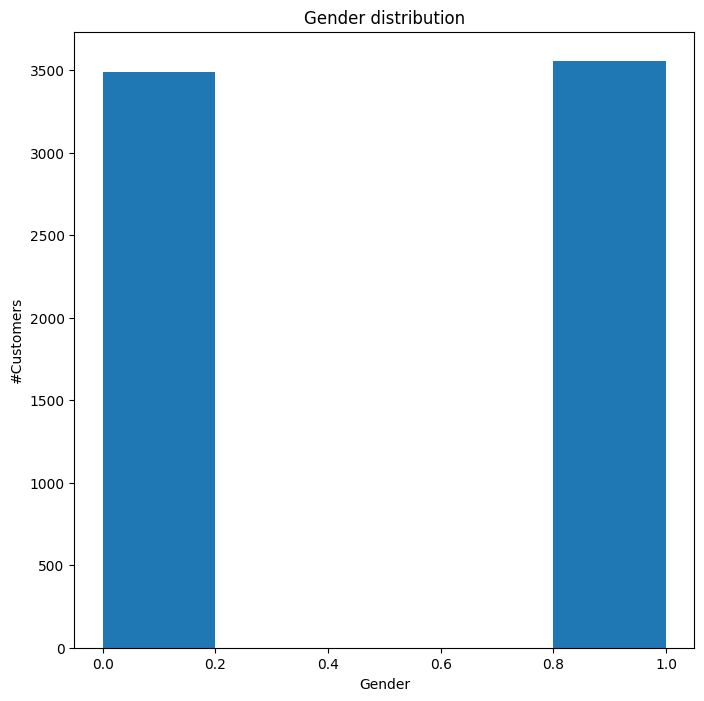

In [92]:
import matplotlib.pyplot as plt
#Plots in matplotlib reside within a figure object, use plt.figure to create new figure
fig = plt.figure(figsize=(8,8))
#Create one or more subplots using add_subplot, because you can't create blank figure
ax = fig.add_subplot(1,1,1)
#Variable
ax.hist(customertable['gender'],bins = 5)
#Labels and Tit
plt.title('Gender distribution')
plt.xlabel('Gender')
plt.ylabel('#Customers')
plt.show()

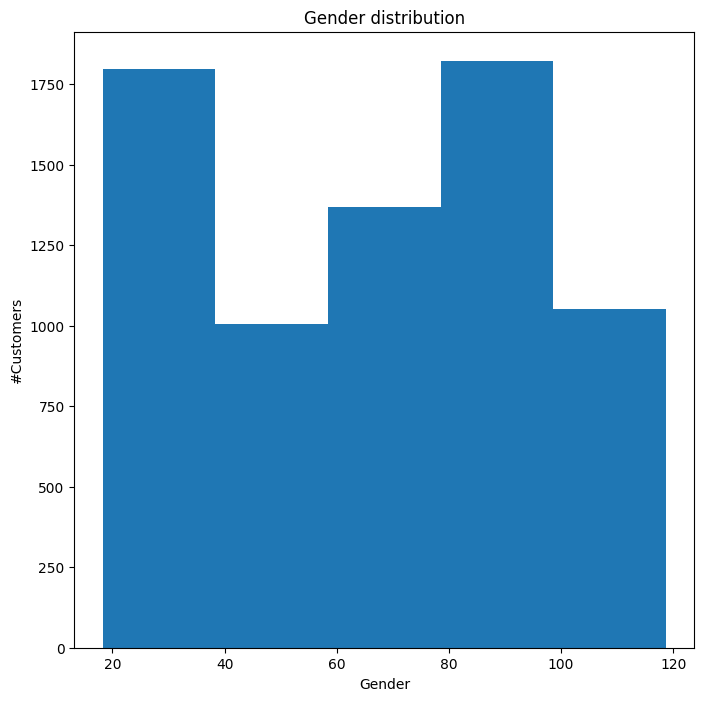

In [93]:
import matplotlib.pyplot as plt
#Plots in matplotlib reside within a figure object, use plt.figure to create new figure
fig = plt.figure(figsize=(8,8))
#Create one or more subplots using add_subplot, because you can't create blank figure
ax = fig.add_subplot(1,1,1)
#Variable
ax.hist(customertable['MonthlyCharges'],bins = 5)
#Labels and Tit
plt.title('Monthly Charge distribution')
plt.xlabel('Monthly Charge')
plt.ylabel('#Customers')
plt.show()

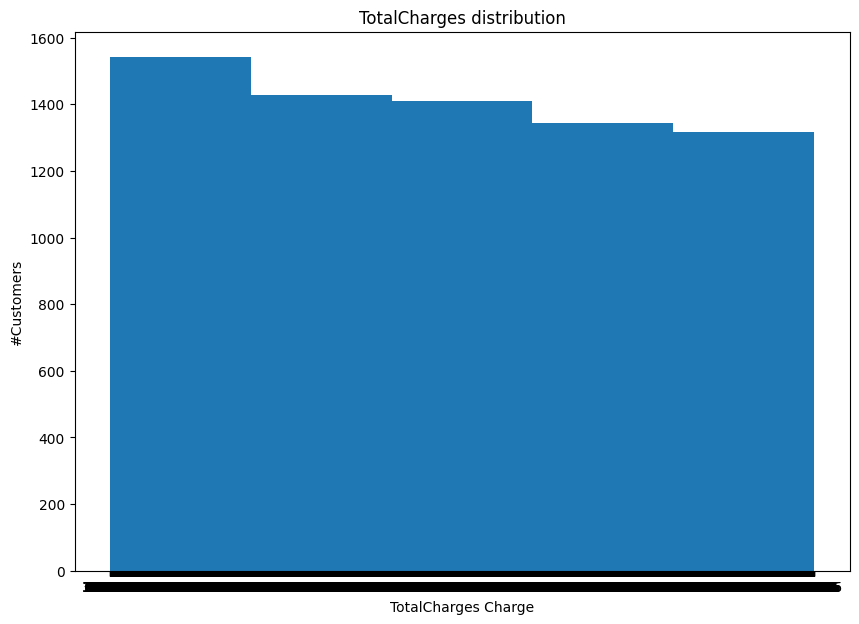

In [106]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize =(10, 7))
plt.hist(customertable['TotalCharges'], bins=5)
plt.title('TotalCharges distribution')
plt.xlabel('TotalCharges Charge')
plt.ylabel('#Customers')
plt.show()

Text(0.5, 0, 'Churn Categories')

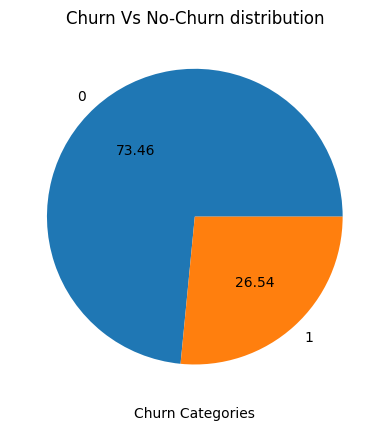

In [111]:
'''fig = plt.figure(figsize =(10, 7))
plt.pie(customertable['Churn'], labels=customertable['Churn'], colors=['red', 'blue', 'green'])
plt.title('Churn Vs No-Churn distribution')
plt.xlabel('Churn Categories')
#plt.ylabel('#Customers')
plt.show()'''

customertable.groupby('Churn').size().plot(kind='pie', autopct='%.2f')
plt.title('Churn Vs No-Churn distribution')
plt.xlabel('Churn Categories')
#plt.ylabel('#Customers')

<Axes: xlabel='MonthlyCharges', ylabel='TotalCharges'>

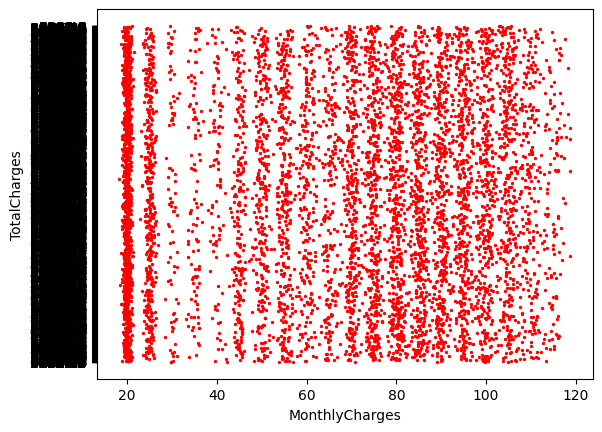

In [113]:
customertable.plot.scatter('MonthlyCharges', 'TotalCharges', s = 2, c = 'red')